<a href="https://colab.research.google.com/github/bghaendler/Miscelanea/blob/master/BJBS_AI_LabSession_01_Iris_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 1 Lab: Iris Database

## 0.- Libraries

- [**Numpy:**](https://numpy.org/) NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays 
- [**Pandas**](https://pandas.pydata.org/) In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software released under the three-clause BSD license
- [**matplotlib**](https://matplotlib.org/)Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+
- [**IPython**](https://ipython.org/)IPython is a command shell for interactive computing in multiple programming languages, originally developed for the Python programming language, that offers introspection, rich media, shell syntax, tab completion, and history. IPython provides the following features: Interactive shells
- [**sklearn**](https://scikit-learn.org/stable/) Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, ...
- [**Mlxtend**](http://rasbt.github.io/mlxtend/) Mlxtend (machine learning extensions) is a Python library of useful tools for the day-to-day data science tasks

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from IPython.core.display import HTML
from sklearn import datasets

from mlxtend.plotting import plot_decision_regions
#http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/


## 1.- Exploratory Data Analysis

### 1.1- What Is IRIS Database



- The Iris dataset was used in **R.A. Fisher's classic 1936 paper**, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.
- It includes three **iris species with 50 samples** each as well as some properties about each flower. 
- **One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.**

<img width="500" src="https://miro.medium.com/max/2200/0*SHhnoaaIm36pc1bd">

- The columns in this dataset are:

1. Id
1. sepal.length	
1. sepal.width	
1. petal.length	
1. petal.width	
1. variety


<img width="500" src="https://www.kaggle.io/svf/138327/e401fb2cc596451b1e4d025aaacda95f/sepalWidthvsLength.png">


- The Iris flower data set consists of 50 samples from each of three species of Iris Flowers — Iris Setosa, Iris Virginica and Iris Versicolor. 
- The Iris flower data set was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper “The use of multiple measurements in taxonomic problems”.
- Iris data is a multivariate data set. Four features measured from each sample are —sepal length, sepal width, petal length and petal width, in centimeters.



### 1.2 Iris flower species
<img width="500px" halign="center" src="https://miro.medium.com/max/2550/0*QHogxF9l4hy0Xxub.png">

- Iris data is publicly available to use and is one of the most widely used data set, mostly by the beginners in the area of Data Science & Machine Learning. It consists of a set of 150 records under 5 attributes — Sepal length, Sepal width, Petal length, Petal width and Class-Labels(Species).
- In Machine learning terminology, 
 - the observed features like sepal length, sepal width, petal length and petal width are **called independent variables** 
 - while the class-label which is to be determined is called **dependent variable**.

**Exploratory data analysis (EDA)**
- Exploratory data analysis (EDA) is a process of analyzing data by using simple concepts from statistics & probability and presenting the results in easy-to-understand pictorial format.

### 1.3 Load The data

In [0]:
iris = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
#iris = iris.drop('Id', axis=1)
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [0]:
pd.pivot_table(iris, index="variety", values=["sepal.length","sepal.width","petal.length","petal.width"], aggfunc=['mean','sum']).T

variety             Setosa  Versicolor  Virginica
mean petal.length    1.462       4.260      5.552
     petal.width     0.246       1.326      2.026
     sepal.length    5.006       5.936      6.588
     sepal.width     3.428       2.770      2.974
sum  petal.length   73.100     213.000    277.600
     petal.width    12.300      66.300    101.300
     sepal.length  250.300     296.800    329.400
     sepal.width   171.400     138.500    148.700

In [0]:
iris.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


### 1.4 What is our objective?

- Given the sepal length, sepal width, petal length and petal width, **classify** the Iris flower into one of the three species — Setosa, Virginica and Versicolor.


### 1.5 Basic Statistical Analysis — Central Tendency and Spread of Data


#### 1.5.1 Determining the mean and median of the different species present in the data set —

In [0]:
iris.groupby('variety').agg(['mean', 'median']).T

variety              Setosa  Versicolor  Virginica
sepal.length mean     5.006       5.936      6.588
             median   5.000       5.900      6.500
sepal.width  mean     3.428       2.770      2.974
             median   3.400       2.800      3.000
petal.length mean     1.462       4.260      5.552
             median   1.500       4.350      5.550
petal.width  mean     0.246       1.326      2.026
             median   0.200       1.300      2.000

- For all the species, the respective values of the **mean and median of it’s features are found to be pretty close**. 
- This indicates that **data is nearly symmetrically distributed with very less presence of outliers**. 
- (Box plot(explained later) is one of the best statistical tool used for outlier detection in the data.)

#### 1.5.2 Computing the Standard deviation —

In [0]:
iris.groupby('variety').std()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,0.352490,0.379064,0.173664,0.105386
Versicolor,0.516171,0.313798,0.469911,0.197753
Virginica,0.635880,0.322497,0.551895,0.274650


Standard deviation (or variance) is an indication of how widely the data is spread about the mean.

### 1.6 Data Visualization

#### 1.6.1 Box Plot



- Box plot, also known as a box and whisker plot, displays a **summary of a large amount of data in five numbers** 
 - minimum, 
 - lower quartile(25th percentile), 
 - median(50th percentile), 
 - upper quartile(75th percentile) and 
 - maximum data values.


 <img width="500" src="https://www.simplypsychology.org/boxplot.jpg?ezimgfmt=rs:555x285/rscb9/ng:webp/ngcb9">

 More information here https://www.simplypsychology.org/boxplots.html

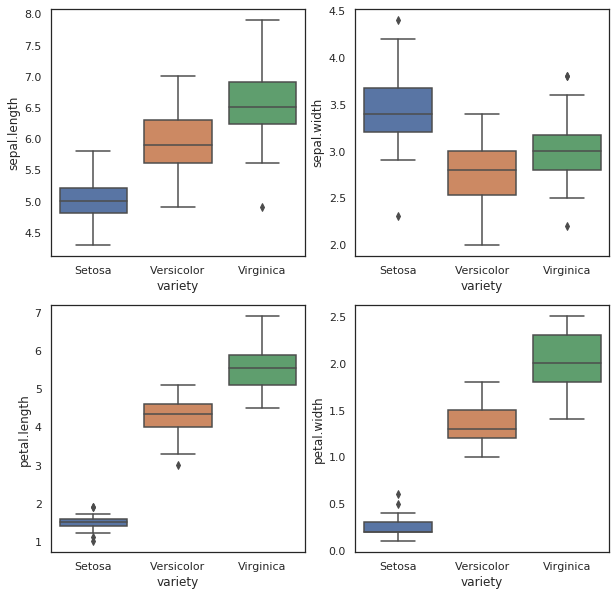

In [0]:
sns.set(style="white") 
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x='variety',y='sepal.length',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='variety',y='sepal.width',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='variety',y='petal.length',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='variety',y='petal.width',data=iris)
plt.show()

- The isolated points that can be seen in the box-plots above are the outliers in the data. 
- Since these are very few in number, it wouldn't have any significant impact on our analysis.- 

#### 1.6.2 Violin Plot



- A violin plot plays a similar role as a box and whisker plot. 
- It shows the distribution of data **across several levels of one (or more) categorical variables**  such that those distributions can be compared. 
- Unlike box plot, in which all of the plot components correspond to actual data points, the violin plot **additionally shows the kernel density estimation** of the underlying distribution.

<img width="500" src="https://miro.medium.com/max/1040/0*BFKtxUXd3mBUB7w1.png">

More information: https://medium.com/@shobhitsrivastava18th/boxplot-v-s-violinplot-93a1d9f3a831


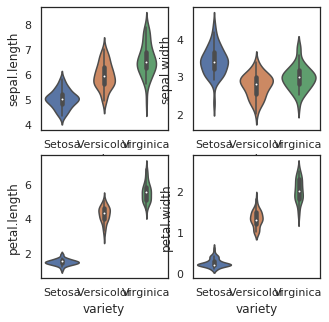

In [0]:
sns.set(style="white") 
plt.figure(figsize=(5,5))
plt.subplot(2,2,1)
sns.violinplot(x='variety',y='sepal.length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='variety',y='sepal.width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='variety',y='petal.length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='variety',y='petal.width',data=iris)
plt.show()

- Violin plots typically are **more informative as compared to the box plots** as violin plots also represent the underlying distribution of the data in addition to the statistical summary.

#### 1.6.3 Probability Density Function (PDF) & Cumulative Distribution Function (CDF)

- Uni-variate as the name suggests is **one variable analysis**. 
 - Our ultimate aim is to be able to correctly identify the specie of Iris flower given it’s features — sepal length, sepal width, petal length and petal width. 
 - Which among the four features is more useful than other variables in order to distinguish between the species of Iris flower ? 
 - To answer this, we will plot the **probability density function(PDF)** with each feature as a variable on X-axis and it’s histogram and corresponding kernel density plot on Y-axis.
 - Before we begin further analysis, we need to split the Data Frame according to the 3 distinct class-labels — Setosa, Versicolor and Virginica.

In [0]:
iris_setosa = iris[iris["variety"] == "Setosa"]
iris_versicolor = iris[iris["variety"] == "Versicolor"]
iris_virginica = iris[iris["variety"] == "Virginica"]

Ploting

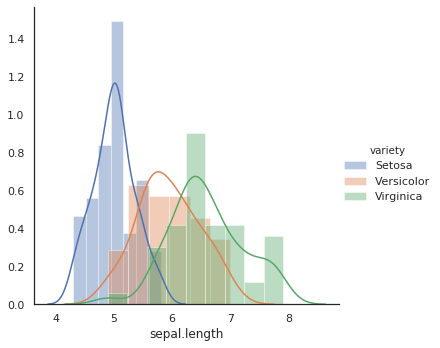

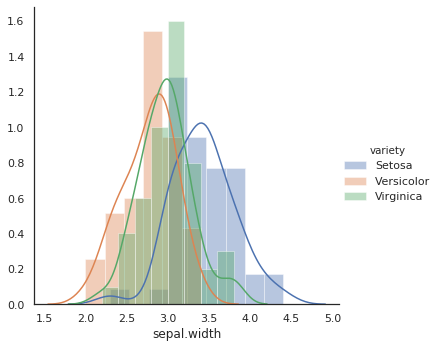

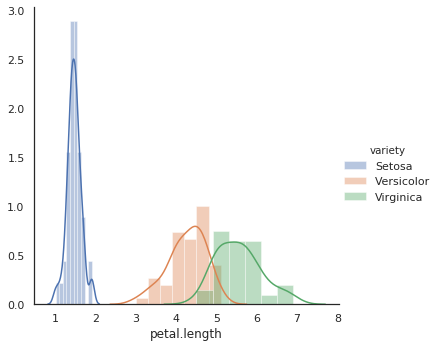

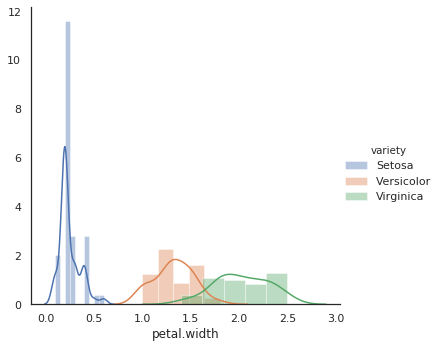

In [0]:
sns.FacetGrid(iris, hue="variety", height=5).map(sns.distplot, "sepal.length").add_legend();
sns.FacetGrid(iris, hue="variety", height=5).map(sns.distplot, "sepal.width").add_legend();
sns.FacetGrid(iris, hue="variety", height=5).map(sns.distplot, "petal.length").add_legend();
sns.FacetGrid(iris, hue="variety", height=5).map(sns.distplot, "petal.width").add_legend();
plt.show()

- The density plot alongside(Plot 1) 
 - reveals that there is a significant amount of overlap between the species on sepal length, so it wouldn’t be a good idea to consider sepal length as a distinctive feature in our uni-variate analysis.
- Plot 2 | Classification feature : Sepal Width
 - With sepal width as a classification feature(Plot 2), the overlap is even more than sepal length as seen in Plot 1 above. The spread of the data is also high. So, again we cannot make any comment on the specie of the flower given it’s sepal width only.
- Plot 3 | Classification feature : Petal Length
- Plot 4 | Classification feature : Petal Width
 - The density plot of petal length alongside(Plot 3) 
  - looks promising from the point of view of uni-variate classification. 
  - The Setosa species are well separated from Versicolor and Virginica, although there is some overlap between the Versicolor and Virginica, but not as bad as the the above two plots.
  - The density plot of petal width alongside(Plot 4) also looks good. 
  - There is slight intersection between the Setosa and Versicolor species, while the overlap between the Versicolor and Virginica is somewhat similar to that of petal length(Plot 3).
- To summarize, if we have to choose one feature for classification, **we will pick petal length (Plot 3)** to distinguish among the species. 
- If we have to select two features, **then we will choose petal width as the second feature**, but then again it would be a wiser to look at pair-plots(bi-variate and multivariate analysis) to determine which two features are most useful in classification.
- We have already established above how petal length could stand out as an useful metric to differentiate between the species of Iris flower. From our preliminary investigation, below pseudo-code can be constructed —
(Note that this estimation is based on the kernel density smoothed probability distribution plots obtained from histograms)

- If petal_length < 2.1 then specie = ‘Setosa’
 - else if petal_length > 2.1 and petal_length < 4.8
 - then specie = ‘Versicolor’
 - else if petal_length > 4.8
 - then specie = ‘Virginica’

- Although the Setosa is clearly separated, there is a small overlap between the Versicolor and Virginica species. The reason why we intuitively considered 4.8 mark to distinguish between Virginica and Versicolor is because from the density plot we can clearly see that although not all, but majority of the Versicolor flowers has petal length less than 4.8 while majority of the Virginica flowers has petal length greater than 4.8.
With this preliminary analysis, it is quiet possible that some Versicolor flowers who’s petal length is greater than 4.8 will get incorrectly classified as Virginica. Similarly, some Virginica flowers who’s petal length happen to be less than 4.8 will get incorrectly classified as Versicolor.
Is there some way to measure what proportion or what percentage of Versicolor and Virginica flowers will be incorrectly classified with above analysis ? That’s where Cumulative distribution plots comes into the picture!

## From Machine Learning Book

In [0]:
# First we load Iris Data base
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [0]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [0]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

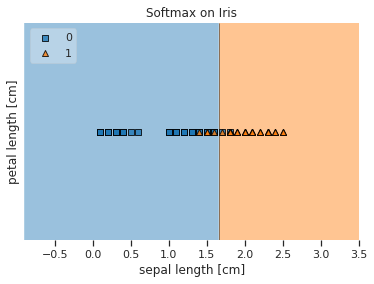

In [0]:
# Plotting decision regions
plot_decision_regions(X, y, clf=log_reg, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Softmax on Iris')
plt.show()

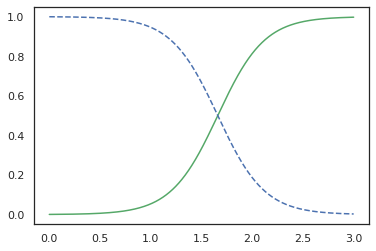

In [0]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
# + more Matplotlib code to make the image look pretty

In [0]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [0]:
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

In [0]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
softmax_reg.predict([[5, 2]])

array([2])

In [0]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

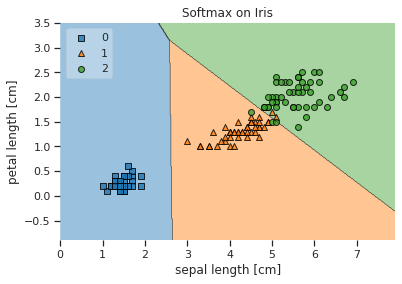

In [0]:
# Plotting decision regions
plot_decision_regions(X, y, clf=softmax_reg, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Softmax on Iris')
plt.show()